In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

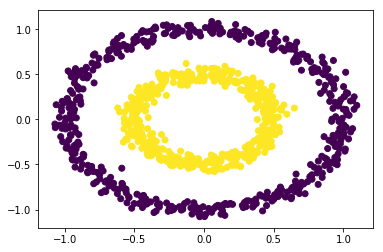

In [7]:
X,y=make_circles(n_samples=1000,noise=0.05,factor=0.5)
plt.scatter(X[:,0],X[:,1],c=y)

In [16]:
#doing transformation manually
col=np.sum(np.square(X),axis=1)
Z  = np.hstack([X,col.reshape(-1,1)])

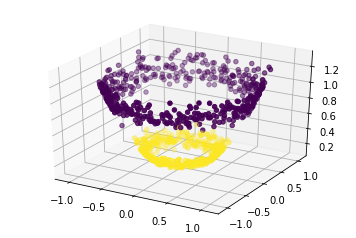

In [20]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(xs=Z[:,0],ys=Z[:,1],zs=Z[:,2],c=y)

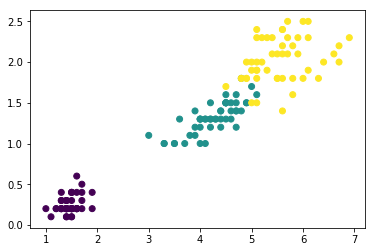

In [23]:
#using kernels
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
iris_data=load_iris()
plt.scatter(iris_data.data[:,2],iris_data.data[:,3],c=iris_data.target)

In [26]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(iris_data.data[:,[2,3]], iris_data.target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [27]:
X=iris_data.data[:,[2,3]]
y=iris_data.target

In [30]:
h=0.02
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

In [38]:
Z=svc.predict(np.c_[xx.ravel(),yy.ravel()])

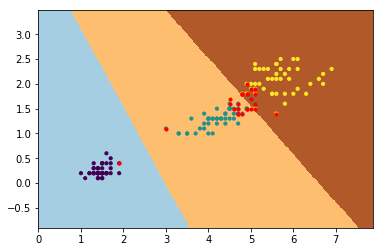

In [46]:
Z=Z.reshape(xx.shape)
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.scatter(X[:,0],X[:,1],c=y,s=10)
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],c='r',s=10)

In [47]:
#the linear sperators are
svc.support_vectors_

array([[1.9, 0.4],
       [4.7, 1.4],
       [4.9, 1.5],
       [4.6, 1.5],
       [4.7, 1.6],
       [4.7, 1.4],
       [4.8, 1.8],
       [4.9, 1.5],
       [4.8, 1.4],
       [5. , 1.7],
       [5.1, 1.6],
       [4.5, 1.6],
       [4.7, 1.5],
       [3. , 1.1],
       [4.5, 1.7],
       [5. , 1.5],
       [4.9, 2. ],
       [4.9, 1.8],
       [4.8, 1.8],
       [4.9, 1.8],
       [5.1, 1.5],
       [5.6, 1.4],
       [4.8, 1.8],
       [5.1, 1.9],
       [5. , 1.9],
       [5.1, 1.8]])

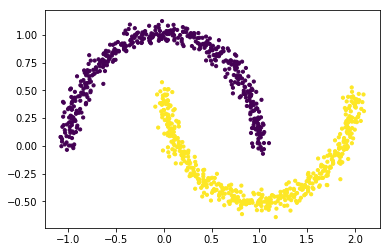

In [48]:
#polynomial kernel
from sklearn.datasets import make_moons
X,Y = make_moons(n_samples=1000, noise=.05)
plt.scatter(X[:,0], X[:,1], c=Y, s=10)


In [49]:
svc=SVC(kernel='poly')
svc.fit(X,Y)


/home/venkat/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [50]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

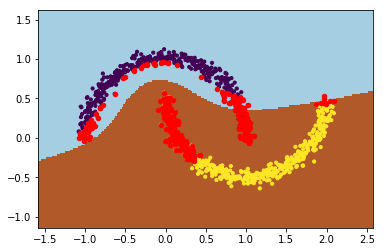

In [51]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=Y,s=10)
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], c='r',s=20)

/home/venkat/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


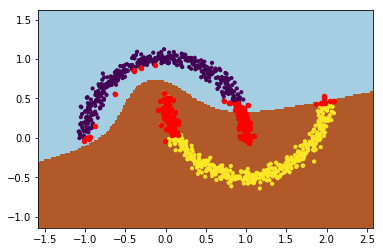

In [55]:
svc = SVC(kernel='poly', C=100)
svc.fit(X,Y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=Y,s=10)
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], c='r',s=20)


/home/venkat/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


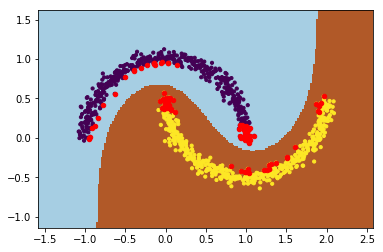

In [56]:
svc = SVC(kernel='rbf')
svc.fit(X,Y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=Y,s=10)
plt.scatter(svc.support_vectors_[:,0], svc.support_vectors_[:,1], c='r',s=20)


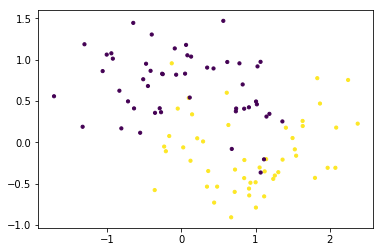

In [57]:
#understanding hyperparameter C
X,Y = make_moons(n_samples=100, noise=.3)
plt.scatter(X[:,0], X[:,1], c=Y, s=10)

In [58]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

/home/venkat/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


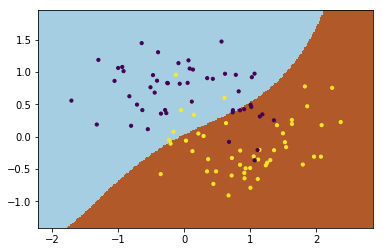

In [59]:
svc = SVC(kernel='rbf', C=0.1)
svc.fit(X,Y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=Y,s=10)

/home/venkat/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


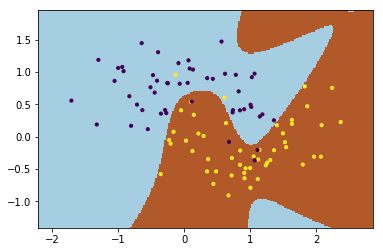

In [60]:
svc = SVC(kernel='rbf', C=10000)
svc.fit(X,Y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=Y,s=10)

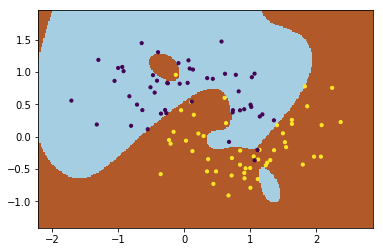

In [65]:
#understanding gamma hyper parameter
#gamma is an hyperparameter to handle non linear classification
#by increasing gamma we are increasing importance of each point
svc = SVC(kernel='rbf', C=100000, gamma=1)
svc.fit(X,Y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=Y,s=10)

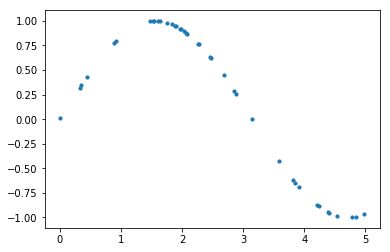

In [67]:
#svm for regression
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
plt.scatter(X, y,s=10)

In [74]:
from sklearn.svm import SVR
svrs = [SVR(kernel='linear'), SVR(kernel='poly'), SVR(kernel='rbf')]
for svr in svrs:
    svr.fit(X,y)

/home/venkat/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/venkat/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


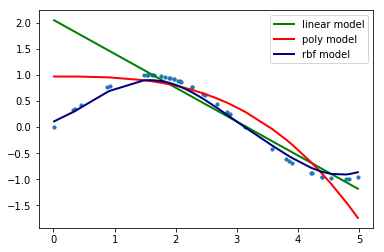

In [75]:
lw = 2
plt.scatter(X, y,s=10)
plt.plot(X, svrs[0].predict(X), color='green', lw=lw, label='linear model')
plt.plot(X, svrs[1].predict(X), color='red', lw=lw, label='poly model')
plt.plot(X, svrs[2].predict(X), color='navy', lw=lw, label='rbf model')
plt.legend()